##Importing necessary libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [89]:
df=pd.read_csv("/content/drive/MyDrive/Notebook/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data processing and understanding

In [90]:
#To view no. rows and columns
df.shape

(284807, 31)

In [91]:
#To view datatypes
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [92]:
#Check null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [94]:
#Check unique value counts in Class column
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

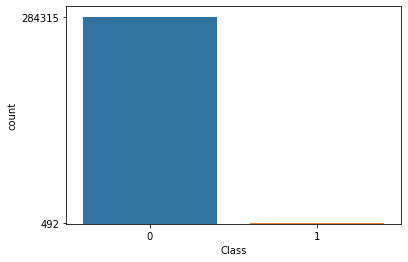

In [95]:
sns.countplot(df['Class'])
c=df['Class'].value_counts()
plt.yticks(c)
plt.show()

In [96]:
#Select input and output
X=df.drop("Class",axis=1)
Y=df["Class"]

## Train-Test Split

In [97]:
#Train the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [98]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

## Data is unbalanced we first need to balance the data

In [99]:
#!pip install imblearn

In [100]:
from imblearn.over_sampling import RandomOverSampler

In [101]:
ros=RandomOverSampler(random_state=1)

In [102]:
#Apply RandomOverSampler on training data
X_train_ros,Y_train_ros=ros.fit_resample(X_train,Y_train)

In [103]:
pd.Series(Y_train).value_counts()

0    199007
1       357
Name: Class, dtype: int64

In [104]:
pd.Series(Y_train_ros).value_counts()

0    199007
1    199007
Name: Class, dtype: int64

In [105]:
#Now apply RandomOverSampler on testing data
X_test_ros,Y_test_ros=ros.fit_resample(X_test,Y_test)

In [106]:
pd.Series(Y_test).value_counts()

0    85308
1      135
Name: Class, dtype: int64

In [107]:
pd.Series(Y_test_ros).value_counts()

0    85308
1    85308
Name: Class, dtype: int64

In [108]:
#Create a user defined function
def create_model(model):
  model.fit(X_train_ros,Y_train_ros)
  Y_pred=model.predict(X_test_ros)
  print(classification_report(Y_test_ros,Y_pred))
  print(confusion_matrix(Y_test_ros,Y_pred))
  return model

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Applying machine learning algorithms

### Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
lr=LogisticRegression()

In [112]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     85308
           1       0.98      0.90      0.94     85308

    accuracy                           0.94    170616
   macro avg       0.94      0.94      0.94    170616
weighted avg       0.94      0.94      0.94    170616

[[83724  1584]
 [ 8874 76434]]


### Decision Tree Classifier

In [113]:
#Now apply Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier

In [114]:
dt=DecisionTreeClassifier()

In [115]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     85308
           1       1.00      0.66      0.79     85308

    accuracy                           0.83    170616
   macro avg       0.87      0.83      0.82    170616
weighted avg       0.87      0.83      0.82    170616

[[85275    33]
 [29201 56107]]


In [116]:
IG=dt.feature_importances_

In [117]:
print(IG)

[1.40599801e-02 8.02674066e-05 1.90551921e-03 1.03915722e-03
 4.40603516e-02 7.18955484e-03 1.81262563e-03 1.24046552e-02
 1.08376523e-02 5.07522100e-03 3.83329468e-02 1.94911980e-03
 2.45296584e-02 1.56980691e-02 7.41961230e-01 8.00481328e-05
 1.30100675e-03 6.42083179e-03 1.98977261e-03 1.11420289e-02
 1.80458340e-02 1.75643481e-03 5.65184768e-03 5.99858364e-03
 7.01533811e-05 4.95957092e-04 6.13820392e-03 5.13286789e-03
 4.15624477e-03 1.06841762e-02]


In [118]:
dic={'Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
14,V14,0.741961
4,V4,0.044060
10,V10,0.038333
12,V12,0.024530
20,V20,0.018046
13,V13,0.015698
0,Time,0.014060
7,V7,0.012405
19,V19,0.011142
8,V8,0.010838


In [119]:
#Applying pruning technique to reduce overfitting
#gini index
dt1=DecisionTreeClassifier(max_depth=8,random_state=1)

In [120]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91     85308
           1       0.99      0.82      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616

[[84390   918]
 [15254 70054]]


In [121]:
IG=dt1.feature_importances_

In [122]:
dic={'Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
14,V14,0.755117
4,V4,0.044225
10,V10,0.037383
12,V12,0.024789
20,V20,0.018003
13,V13,0.015802
7,V7,0.012579
19,V19,0.011284
29,Amount,0.010868
0,Time,0.010574


In [123]:
dt2=DecisionTreeClassifier(min_samples_leaf=60,random_state=1)

In [124]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     85308
           1       1.00      0.81      0.90     85308

    accuracy                           0.91    170616
   macro avg       0.92      0.91      0.90    170616
weighted avg       0.92      0.91      0.90    170616

[[85026   282]
 [15837 69471]]


In [125]:
IG=dt2.feature_importances_

In [126]:
dic={'Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
14,V14,0.745760
4,V4,0.044317
10,V10,0.037946
12,V12,0.025012
20,V20,0.017698
13,V13,0.015858
0,Time,0.014629
7,V7,0.012198
19,V19,0.011150
29,Amount,0.010764


In [127]:
#Entropy method of decision tree
dt3=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=50,random_state=1)

In [128]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     85308
           1       1.00      0.80      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.92      0.90      0.90    170616
weighted avg       0.92      0.90      0.90    170616

[[85110   198]
 [17001 68307]]


In [129]:
IG=dt3.feature_importances_

In [130]:
dic={'Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
14,V14,0.692302
4,V4,0.071094
29,Amount,0.035552
12,V12,0.027982
22,V22,0.022972
26,V26,0.015657
2,V2,0.013417
16,V16,0.012258
11,V11,0.012136
10,V10,0.011511


In [131]:
dt4=DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=1)

In [132]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     85308
           1       0.99      0.76      0.86     85308

    accuracy                           0.88    170616
   macro avg       0.90      0.88      0.87    170616
weighted avg       0.90      0.88      0.87    170616

[[84960   348]
 [20893 64415]]


In [133]:
IG=dt4.feature_importances_

In [134]:
dic={'Columns':X.columns,'Information_Gain':IG}
df1=pd.DataFrame(dic)
df1.sort_values("Information_Gain",ascending=False)

,Columns,Information_Gain
14,V14,0.711519
4,V4,0.067383
29,Amount,0.036487
12,V12,0.027736
22,V22,0.022500
26,V26,0.015895
2,V2,0.012190
11,V11,0.011927
10,V10,0.011920
16,V16,0.011831


### Random Forest Classifier

In [135]:
#Ensembling Technique
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [137]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     85308
           1       1.00      0.74      0.85     85308

    accuracy                           0.87    170616
   macro avg       0.90      0.87      0.87    170616
weighted avg       0.90      0.87      0.87    170616

[[85300     8]
 [22331 62977]]


###Boosting

In [138]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
ada=AdaBoostClassifier(n_estimators=10,random_state=1)

In [140]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     85308
           1       0.96      0.90      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.93      0.93      0.93    170616
weighted avg       0.93      0.93      0.93    170616

[[81925  3383]
 [ 8199 77109]]


In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [142]:
gbc=GradientBoostingClassifier(n_estimators=100,random_state=1)

In [143]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85308
           1       0.99      0.85      0.92     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84842   466]
 [12603 72705]]


In [144]:
from xgboost import XGBClassifier

In [145]:
xgb=XGBClassifier(n_estimators=100,random_state=1)

In [146]:
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     85308
           1       0.99      0.84      0.91     85308

    accuracy                           0.92    170616
   macro avg       0.93      0.92      0.92    170616
weighted avg       0.93      0.92      0.92    170616

[[84889   419]
 [13886 71422]]


### K-Nearest Neighbors

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [149]:
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     85308
           1       1.00      0.78      0.87     85308

    accuracy                           0.89    170616
   macro avg       0.91      0.89      0.89    170616
weighted avg       0.91      0.89      0.89    170616

[[85247    61]
 [19106 66202]]


### Support Vector Machine

In [150]:
from sklearn.svm import LinearSVC

In [151]:
svc=LinearSVC(random_state=1)

In [152]:
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94     85308
           1       0.98      0.88      0.93     85308

    accuracy                           0.93    170616
   macro avg       0.94      0.93      0.93    170616
weighted avg       0.94      0.93      0.93    170616

[[83865  1443]
 [10100 75208]]


### Naive Bayes Classifier

In [153]:
from sklearn.naive_bayes import GaussianNB

In [155]:
gnb=GaussianNB()

In [156]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     85308
           1       0.97      0.82      0.89     85308

    accuracy                           0.90    170616
   macro avg       0.91      0.90      0.90    170616
weighted avg       0.91      0.90      0.90    170616

[[83203  2105]
 [15152 70156]]


### Recall of Logistic Regression and Ada Boost Classifier algorithm is 90%, so these two algorithms best for this dataset.